# Lineages of Planaria: constructing a cell map using graph abstraction

This notebook reproduces the main cell map with its lineage relations. For this, it mostly uses the [Scanpy](https://github.com/theislab/scanpy) package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()
results_file = './write/planaria_171202_R.h5ad'

Running Scanpy 0.4.2.post2 on 2018-02-06 15:29.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


Some plotting parameters.

In [10]:
aga_plot_params = dict(
    legend_fontsize=5,
    root='neoblast 1',
    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    max_edge_width=0.7,
    fontsize=3.5)

## Reading

We use Seurat's preprocessing and load the PCA representation of the data.

In [2]:
adata = sc.read('./data/171202/R_pca.txt')
clusters = pd.read_csv('./data/171202/R_annotation.txt', header=None)
adata.obs['clusters'] = clusters[0].values
adata.uns['iroot'] = 6  # root cell (the first neoblast in the file)

In [3]:
adata

AnnData object with n_obs × n_vars = 21612 × 50 
    obs_keys = ['clusters']
    uns_keys = ['iroot']

In [4]:
adata_full = sc.read('./data/171202/reg.dge.txt', cache=True).transpose()

... reading from cache file ./write/data/171202/reg.dge.h5


In [5]:
adata_full

AnnData object with n_obs × n_vars = 21612 × 28065 

## Embedding

In [6]:
sc.tl.tsne(adata)
adata.write(results_file)

computing tSNE
    using data matrix X directly (no PCA)
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:01:27.059)


Add Mireya's colors.

In [7]:
sc.utils.sanitize_anndata(adata)
colors = pd.read_csv('./data/180108/R_colors_dataset.txt', header=None, sep='\t')
colors = dict(colors.values)
hex_codes = {
    # new ones
    'lightblue3': '#9ac0cd', 'orchid3': '#b452cd', 'indianred 3': '#cd5555', 'grey60': '#999999',
    'mediumorchid1': '#e066ff', 'plum3': '#cd96cd', 'palevioletred3': '#cd6889',    
    # old ones
    'gold2': '#eec900', 'firebrick3': '#cd2626', 'khaki2': '#eee685', 'slategray3': '#9fb6cd',
    'palegreen3': '#7ccd7c', 'tomato2': '#ee5c42', 'grey80': '#cccccc', 'grey90': '#e5e5e5',
    'wheat4': '#8b7e66', 'grey65': '#a6a6a6', 'grey10': '#1a1a1a',
    'grey20': '#333333', 'grey50': '#7f7f7f', 'grey30': '#4d4d4d',
    'grey40': '#666666', 'antiquewhite2': '#eedfcc', 'grey77': '#c4c4c4', 'snow4': '#8b8989',
    'chartreuse3': '#66cd00', 'yellow4': '#8b8b00', 'darkolivegreen2': '#bcee68',
    'olivedrab3': '#9acd32', 'azure3': '#c1cdcd', 'violetred': '#d02090',
    'mediumpurple3': '#8968cd', 'purple4': '#551a8b', 'seagreen4': '#2e8b57'}
colors = {k: c if c not in hex_codes else hex_codes[c] for k, c in colors.items()}
adata.uns['clusters_colors'] = [colors[cluster] for cluster in adata.obs['clusters'].cat.categories]
adata.write(results_file)

... storing clusters as categorical type


Rename the clusters with the updated ids.

In [4]:
adata = sc.read(results_file)
new_categories = pd.read_csv('./data/180127/old_and_new_ids.txt', sep='\t', header=None, index_col=0)
adata.obs['clusters'].cat.categories = [
    new_categories.loc[c].values[0] for c in adata.obs['clusters'].cat.categories]
# once again
new_categories = pd.read_csv('./data/180202/old_and_new_ids-2.txt', sep='\t', header=None, index_col=0)
adata.obs['clusters'].cat.categories = [
    new_categories.loc[c].values[0] for c in adata.obs['clusters'].cat.categories]
adata.write(results_file)

Do the actual plotting.

saving figure to file ./figures/tsne_full.png


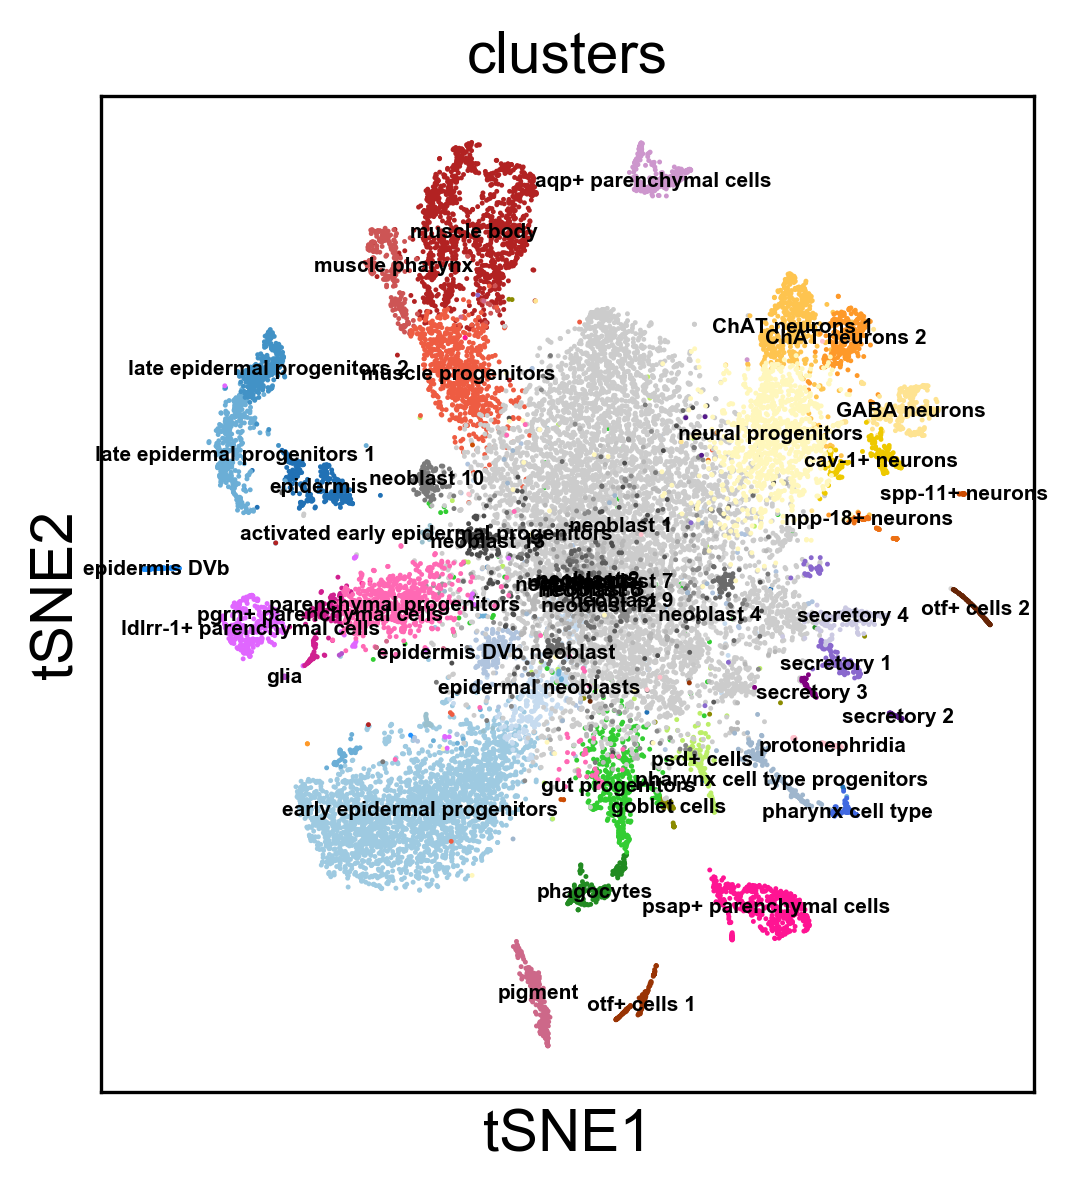

In [7]:
adata = sc.read(results_file)
sc.pl.tsne(adata, color='clusters', legend_loc='on data', legend_fontsize=5, legend_fontweight='bold', save='_full')

In [9]:
sc.tl.draw_graph(adata)
adata.write(results_file)

drawing single-cell graph using layout "fr"
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9946672916  0.9940783978  0.993825078   0.992790997
      0.9918637276  0.9917253852  0.9908070564  0.9875212312  0.9870548844
      0.9819034338  0.9814419746  0.9803594947  0.9790614247  0.9773468375]
    finished (0:51:25.332)


saving figure to file ./figures/draw_graph_fr_full.png


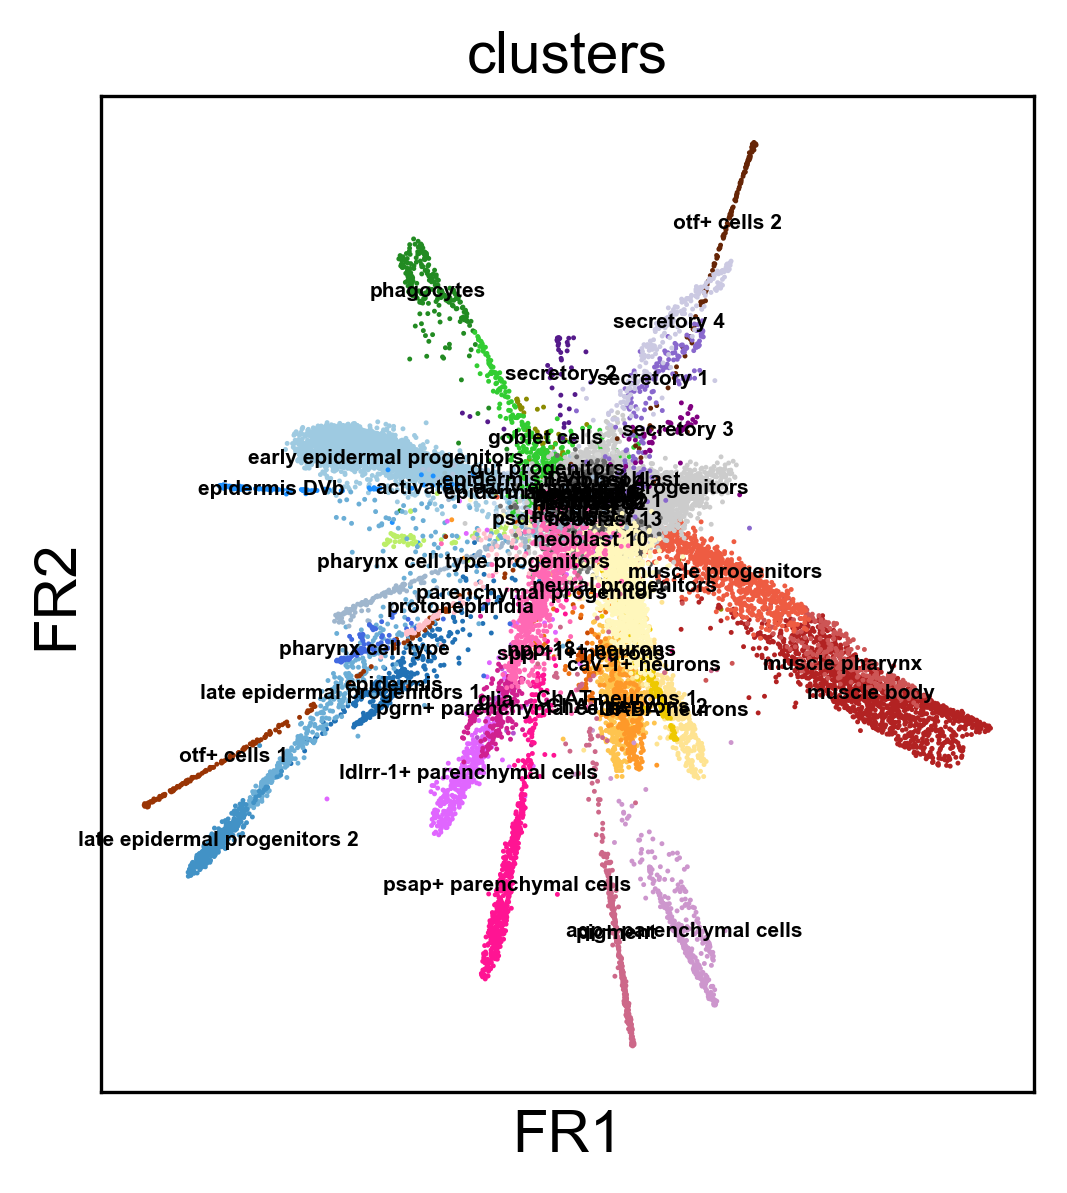

In [9]:
adata = sc.read(results_file)
sc.pl.draw_graph(adata, color='clusters', legend_loc='on data', legend_fontsize=5, legend_fontweight='bold', save='_full')

## Cell map from AGA

In [12]:
adata = sc.read(results_file)
sc.tl.aga(adata, groups='clusters', n_neighbors=30)
adata.write(results_file)

running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            0.9946672916  0.9940783978  0.993825078   0.992790997
      0.9918637276  0.9917253852  0.9908070564  0.9875212312  0.9870548844
      0.9819034338  0.9814419746  0.9803594947  0.9790614247  0.9773468375]
    abstracted graph will have 51 nodes
    finished (0:00:09.991)


saving figure to file ./figures/aga_100percent.png


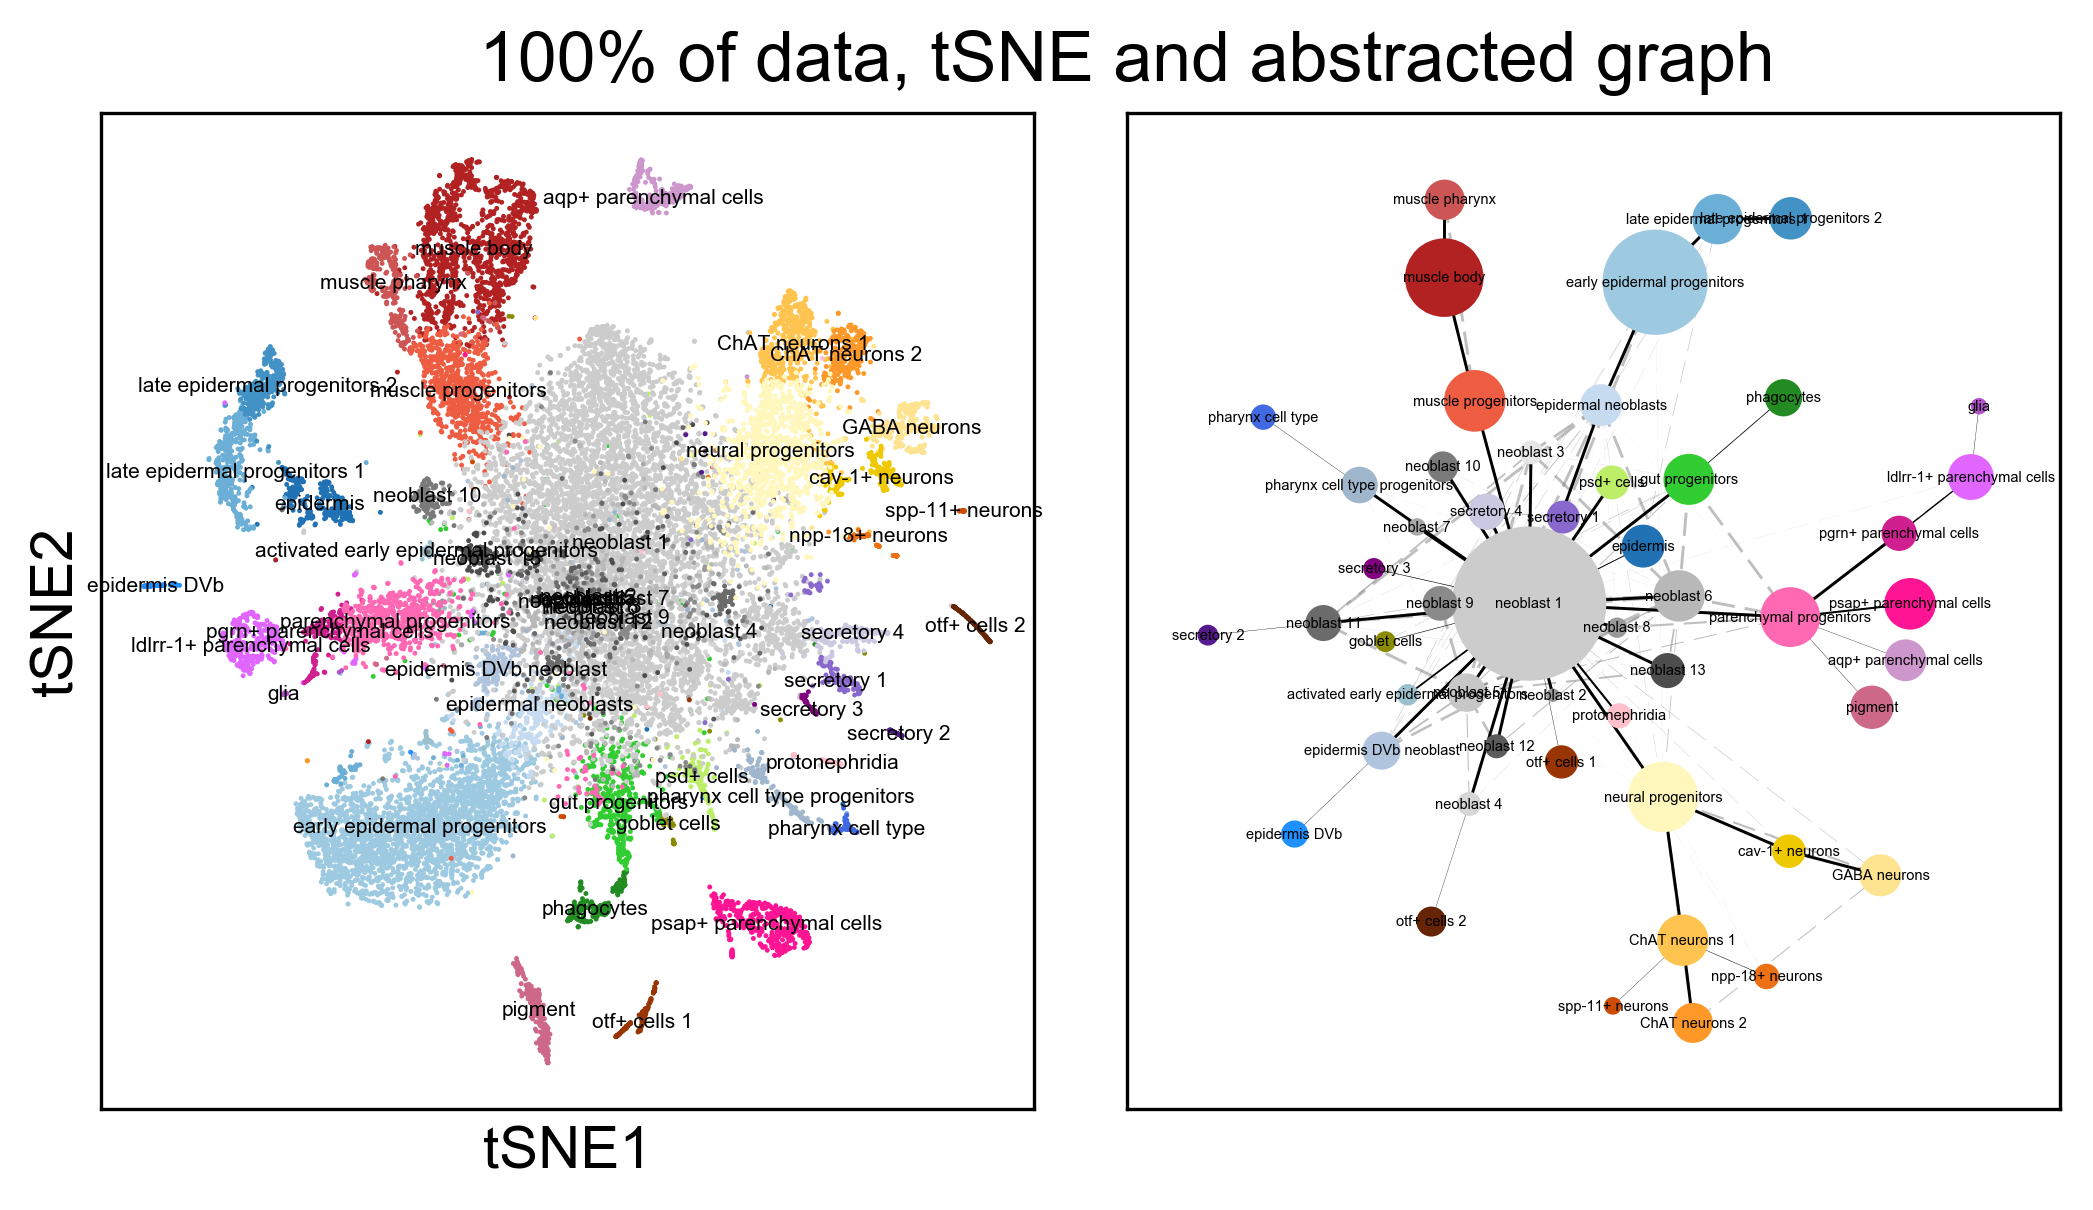

In [13]:
adata = sc.read(results_file)
sc.pl.aga(adata, title='100% of data, tSNE and abstracted graph', **aga_plot_params, save='_100percent')

Let's draw this with the Fruchterman-Reingold layout.

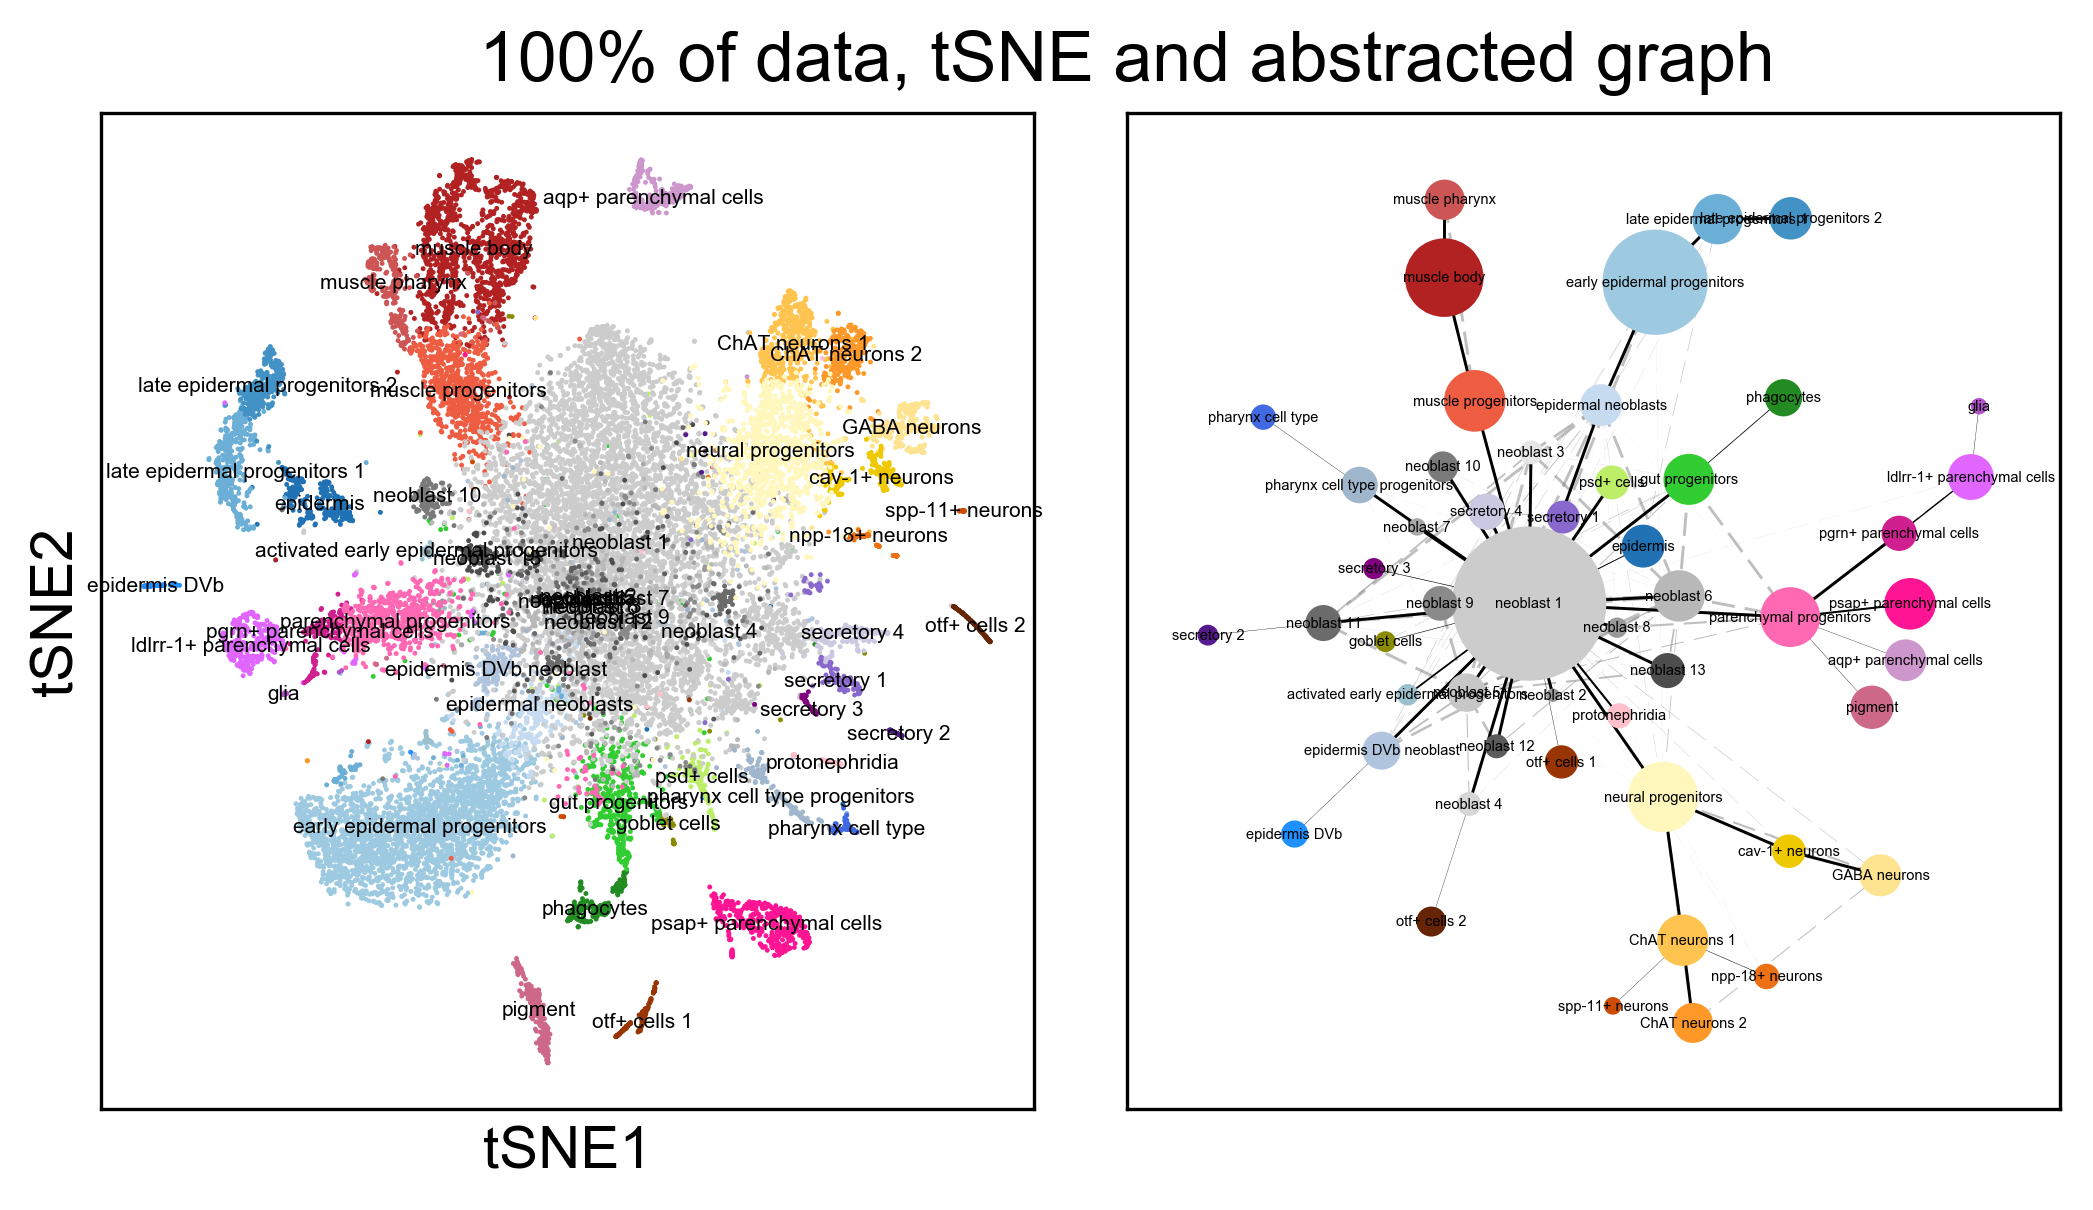

In [12]:
adata = sc.read(results_file)
aga_plot_params['layout'] = 'fr'
sc.pl.aga(adata, title='100% of data, tSNE and abstracted graph', **aga_plot_params)

## Exports

Exports for external usage.

In [36]:
adata = sc.read(results_file)
adata.obs[['clusters', 'aga_pseudotime']].to_csv('./export_R_dataset/aga_groups_pseudotime.csv')
np.savetxt('./export_R_dataset/aga_groups_ordered_names.csv',
           adata.obs['clusters'].cat.categories, fmt='%s')
np.savetxt('./export_R_dataset/aga_adjacency_full.txt', adata.uns['aga_adjacency_full_confidence'])
from scipy.io import mmwrite
mmwrite('./export_R_dataset/aga_adjacency_tree.mtx', adata.uns['aga_adjacency_tree_confidence'])
entropies = sc.tl.aga_expression_entropies(adata)
np.savetxt('./export_R_dataset/aga_expression_entropies.txt', entropies)
degrees = sc.tl.aga_degrees(adata)
degrees = (degrees - np.min(degrees)) / (np.max(degrees) - np.min(degrees)) 
np.savetxt('./export_R_dataset/aga_expression_degrees.txt', degrees)